In [1]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection  import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, mean_squared_error

## Nearest Neighbors

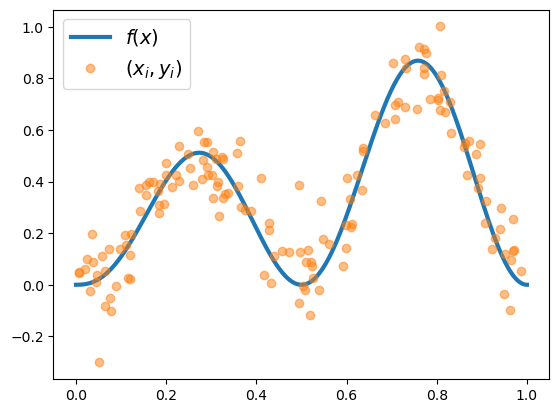

In [2]:
def f(x):
    return np.sqrt(x)*np.sin(2*np.pi*x)**2

def make_data(size, s=0.1, random_state=None):
    if random_state is not None:
        np.random.seed(random_state)
    x = np.random.uniform(size=size)
    y = f(x) + s*np.random.normal(size=size)
    return x, y

X, y = make_data(150, random_state=42)
t = np.linspace(0, 1, 1000)
plt.plot(t, f(t), lw=3, label="$f(x)$")
plt.plot(X, y, "o", label="$(x_i, y_i)$", alpha=0.5)
plt.legend(loc="upper left", fontsize=14)
plt.show()

In [3]:
# Taking 30% data as test and 70% as training data. 
X_tr, X_test, y_tr, y_test = train_test_split(X, y, test_size = 0.3)
# Taking odd integers as K vales so that majority rule can be applied easily. 
neighbors = np.arange(1, 20, 2)
scores = []
for k in neighbors:   # running for different K values to know which yields the max accuracy. 
    clf = KNeighborsRegressor(n_neighbors = k,  weights = 'distance', p=1)
    clf.fit(X_tr.reshape(-1, 1), y_tr)
    score = cross_val_score(clf, X_tr.reshape(-1, 1), y_tr, cv = 10)
    scores.append(score.mean())
    
print(scores)

#the above is accuracy calculation. To get the error rate, we need to substract each value by 1
CVerror = [1-x for x in scores]

print(CVerror)

[0.6256911559216217, 0.7250624069067747, 0.751060169034578, 0.7641546383521097, 0.7743362379472389, 0.7773420036481218, 0.7722842412831129, 0.775758059208427, 0.7731397851925581, 0.7705448638630987]
[0.3743088440783783, 0.2749375930932253, 0.24893983096542205, 0.23584536164789027, 0.22566376205276106, 0.22265799635187822, 0.2277157587168871, 0.224241940791573, 0.2268602148074419, 0.22945513613690127]


Text(0.5, 1.0, 'CV error with one-standard-error vs. K neighbors')

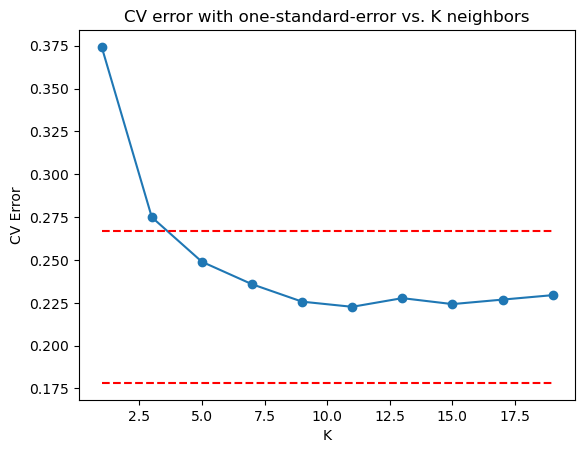

In [4]:
sd = np.std(CVerror)
min_error = np.min(CVerror)
L = min_error - sd
U = min_error + sd
plt.scatter(neighbors,CVerror)
plt.plot(neighbors,CVerror)
plt.hlines(L,np.min(neighbors),np.max(neighbors),colors='red', linestyles='dashed')
plt.hlines(U,np.min(neighbors),np.max(neighbors),colors='red', linestyles='dashed')
plt.xlabel('K')
plt.ylabel('CV Error')
plt.title("CV error with one-standard-error vs. K neighbors")

In [5]:
optimal_k = 5
clf_optimal = KNeighborsRegressor(n_neighbors = k)
#clf.fit(X_test.reshape(-1, 1), y_tr)
y_pred = clf.predict(X_test.reshape(-1, 1))

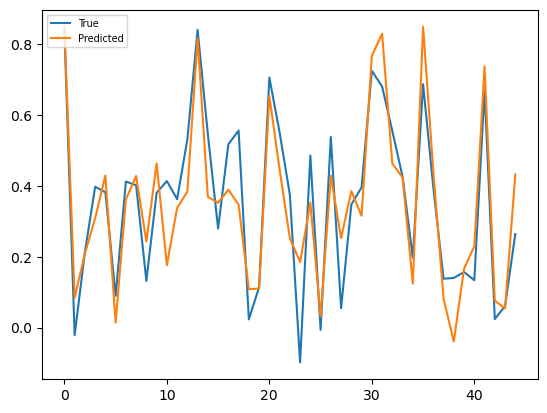

In [6]:
plt.plot(np.arange(len(y_test)), y_test, label ="True")
plt.plot(np.arange(len(y_test)), y_pred,label ="Predicted")
plt.legend(loc="upper left", fontsize=7)


## Kernel regression

Training data:

$$
(x_1,y_1),\ldots,(x_n,y_n)\in\mathbb{R}^p\times \mathbb{R}
$$

A **weighted average regressor** is a function $f:\mathbb{R}^p\to\mathbb{R}$ of the form

$$
f(x) = W(x, x_1)y_1 + \cdots + W(x, x_n)y_n,
$$

where $W(x, x_j)$ is a **weight** associated to $x$ and $x_j$ such that
$$
\sum_{i=1}^n W(x, x_j) = 1.
$$

Typically, $W$ is chosen so that $W(x, x_j)$ is large if $x_j$ is close to $x$ and small otherwise.

The $k$-nearest neighbors regressor is a weighted average regressor with weights

$$
W(x, x_j) = \begin{cases}
\dfrac1k&\text{if $x_j$ is among the $k$ nearest neighbors of $x$ in $\{x_1,\ldots,x_n\}$,}\\[1ex]
0&\text{otherwise.}
\end{cases}
$$

A convenient way of generating weights is using a **kernel function**, $K:\mathbb{R}\to [0,\infty)$ and a **bandwidth parameter** $h>0$ and setting

$$
W(x, x_j) = \frac{K(\|x - x_j\|/h)}{\sum_{k=1}^n K(\|x - x_k\|/h)}
$$

If $K(t)$ is large for $t$ close to $0$ and small otherwise, then $K(\|x-x_j\|/h)$ will be large if $x_j$ is close to $x$ and small otherwise, as desired.

The smaller the bandwidth parameter $h$, the more the function $x_j\mapsto K(\|x - x_j\|/h)$ is concentrated near $x$.

A weighted average regressor constructed whose weights are constructed using a kernel function as above is called a **kernel regressor**.

Some standard choices for the kernel function $K$ are:

**Uniform kernel**:

$$
U(x) = \begin{cases}
1&\text{if $|x|\leq 1/2$},\\
0&\text{otherwise}
\end{cases}
$$

**Triangular kernel**:

$$
T(x) = \begin{cases}
1 - |x|&\text{if $|x|\leq 1$},\\
0&\text{otherwise}
\end{cases}
$$

**Gaussian kernel**:
$$
G(x) = \frac1{\sqrt{2\pi}}e^{-x^2/2}
$$


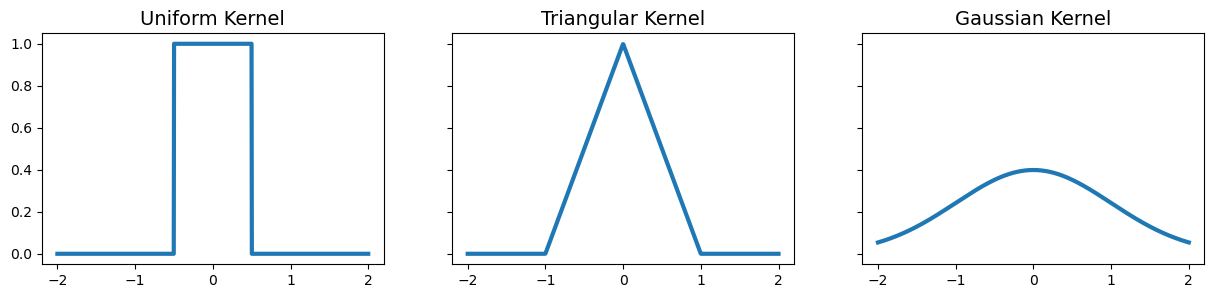

In [7]:
def U(x):
  return 1*(np.abs(x) <= 0.5)

def T(x):
  return 1*(1-np.abs(x))*(np.abs(x) <= 1)

def G(x):
  return np.exp(-x**2/2)/np.sqrt(2*np.pi)

fig, axes = plt.subplots(1, 3, figsize=(15, 3), sharey=True)
t = np.linspace(-2, 2, 1000)

axes[0].plot(t, U(t), lw=3)
axes[0].set_title("Uniform Kernel", fontsize=14)
axes[1].plot(t, T(t), lw=3)
axes[1].set_title("Triangular Kernel", fontsize=14)
axes[2].plot(t, G(t), lw=3)
axes[2].set_title("Gaussian Kernel", fontsize=14)
plt.show()

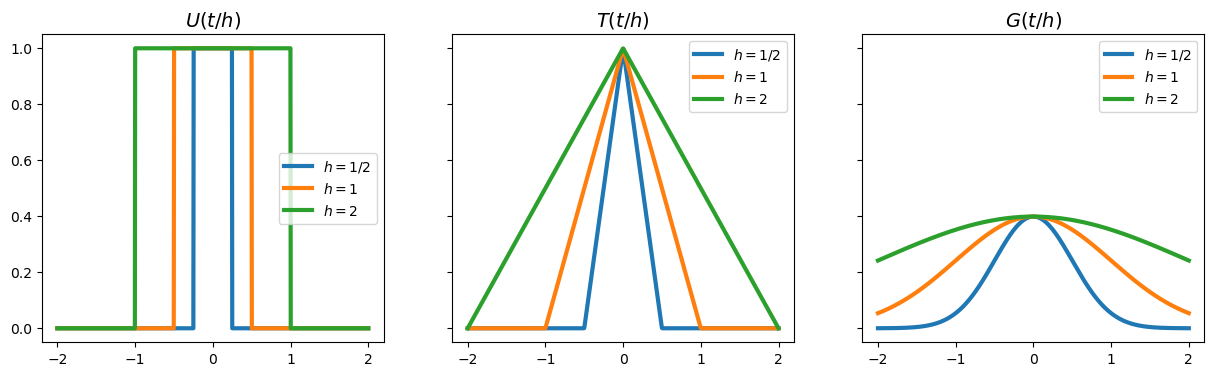

In [8]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4), sharey=True)
t = np.linspace(-2, 2, 1000)

axes[0].plot(t, U(t/0.5), lw=3, label="$h=1/2$")
axes[0].plot(t, U(t), lw=3, label="$h=1$")
axes[0].plot(t, U(t/2), lw=3, label="$h=2$")
axes[0].legend()
axes[0].set_title("$U(t/h)$", fontsize=14)
axes[1].plot(t, T(t/0.5), lw=3, label="$h=1/2$")
axes[1].plot(t, T(t), lw=3, label="$h=1$")
axes[1].plot(t, T(t/2), lw=3, label="$h=2$")
axes[1].legend()
axes[1].set_title("$T(t/h)$", fontsize=14)
axes[2].plot(t, G(t/0.5), lw=3, label="$h=1/2$")
axes[2].plot(t, G(t), lw=3, label="$h=1$")
axes[2].plot(t, G(t/2), lw=3, label="$h=2$")
axes[2].legend()
axes[2].set_title("$G(t/h)$", fontsize=14)
plt.show()

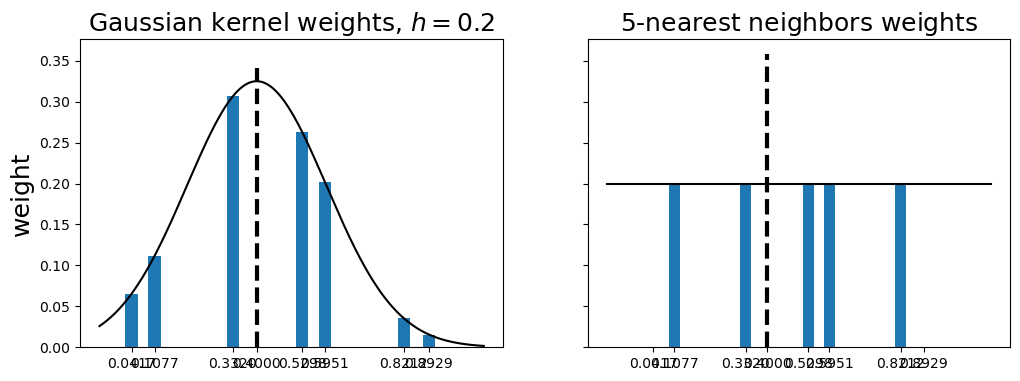

In [9]:
np.random.seed(6)

n = 7
x_tr = np.random.uniform(size=n)
x = 0.4
h = 0.2

total_weight = G(np.abs(x - x_tr)/h).sum()
weights = G(np.abs((x - x_tr)/h))/total_weight

fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(12, 4), sharey=True)

t = np.linspace(-0.05, 1.05, 1000)
ax0.plot(t, G(np.abs(t - x)/h)/total_weight, 'k')
ax0.bar(x_tr, weights, width=0.035)
ax0.set_xticks(ticks=[x, *x_tr])

ax0.set_title("Gaussian kernel weights, $h=0.2$", fontsize=18)
ax0.set_ylabel("weight", fontsize=18)
ax0.vlines(x, *plt.ylim(), colors="k", linestyles="--", linewidths=3)

ax1.set_xticks(ticks=[x, *x_tr])

ax1.bar(x_tr, 0.2*np.array([0, 1, 1, 0, 1, 1, 1]), width=0.035)
ax1.vlines(x, *plt.ylim(), colors="k", linestyles="--", linewidths=3)
ax1.plot(ax0.get_xlim(), [0.2, 0.2], 'k')
ax1.set_title("$5$-nearest neighbors weights", fontsize=18)

plt.show()

In [10]:
print(G(np.abs(t - x)/h)/total_weight)

[0.02585821 0.02618012 0.02650524 0.02683358 0.02716516 0.02750001
 0.02783814 0.02817957 0.02852433 0.02887243 0.02922389 0.02957874
 0.02993698 0.03029865 0.03066375 0.03103232 0.03140436 0.0317799
 0.03215895 0.03254154 0.03292769 0.0333174  0.03371071 0.03410763
 0.03450817 0.03491236 0.03532021 0.03573174 0.03614698 0.03656593
 0.03698861 0.03741505 0.03784525 0.03827925 0.03871704 0.03915866
 0.03960411 0.04005342 0.04050659 0.04096365 0.04142461 0.04188949
 0.04235831 0.04283107 0.04330779 0.0437885  0.0442732  0.0447619
 0.04525463 0.0457514  0.04625221 0.0467571  0.04726606 0.04777911
 0.04829627 0.04881754 0.04934295 0.0498725  0.0504062  0.05094408
 0.05148613 0.05203237 0.05258281 0.05313747 0.05369634 0.05425946
 0.05482681 0.05539842 0.05597429 0.05655443 0.05713886 0.05772757
 0.05832058 0.0589179  0.05951953 0.06012548 0.06073576 0.06135038
 0.06196933 0.06259264 0.06322029 0.06385231 0.06448868 0.06512943
 0.06577455 0.06642405 0.06707792 0.06773618 0.06839883 0.069065

In [11]:

def f(x):
    return np.sqrt(x)*np.sin(2*np.pi*x)**2

def make_data(size, s=0.1, random_state=None):
    if random_state is not None:
        np.random.seed(random_state)
    x = np.random.uniform(size=size)
    y = f(x) + s*np.random.normal(size=size)
    return x, y

x, y = make_data(100, random_state=42)
X = x.reshape(-1, 1)

0.032


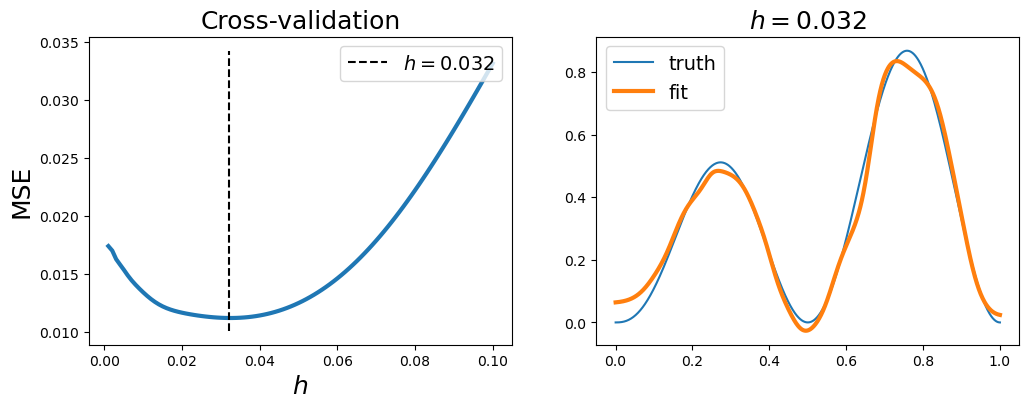

In [12]:
from skfda.ml.regression._kernel_regression import KernelRegression
from skfda.misc.hat_matrix import NadarayaWatsonHatMatrix
from sklearn.model_selection import GridSearchCV
# kernel_estimator = NadarayaWatsonHatMatrix(bandwidth=1)
# model = KernelRegression(kernel_estimator=kernel_estimator)


hs = np.arange(0.001, 0.101, 0.001)
# hs = np.arange(0.1, 0.3, 0.001)
kernel_estimators = []
for i in range(len(hs)):
    kernel_estimators.append(NadarayaWatsonHatMatrix(bandwidth=hs[i])) #

param_grid = {"kernel_estimator": kernel_estimators}
search = GridSearchCV(KernelRegression(), param_grid=param_grid, scoring="neg_mean_squared_error", cv=5)
search.fit(X, y)

best_kernal_estimator = search.best_params_["kernel_estimator"]
best_params = best_kernal_estimator.get_params()
h = best_params['bandwidth']
print(h)
best_model = search.best_estimator_

fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(12, 4))

ax0.plot(hs, -search.cv_results_["mean_test_score"], lw=3)
ax0.plot([h, h], ax0.get_ylim(), "k--", label=f"$h={h}$")
ax0.set_xlabel("$h$", fontsize=18)
ax0.set_ylabel("MSE", fontsize=18)
ax0.legend(fontsize=14, loc="upper right")
ax0.set_title("Cross-validation", fontsize=18)
y0, y1 = ax0.get_ylim()

t = np.linspace(0, 1, 1000)
ax1.plot(t, f(t), label="truth")
ax1.plot(t, best_model.predict(t.reshape(-1, 1)), lw=3, label="fit")
ax1.legend(loc="upper left", fontsize=14)
ax1.set_title(f"$h={h}$", fontsize=18)

plt.show()

In [13]:
import pandas as pd
pd.DataFrame(search.cv_results_)


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_kernel_estimator,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.0,0.0,0.001403,0.002806,NadarayaWatsonHatMatrix(bandwidth=0.001),{'kernel_estimator': NadarayaWatsonHatMatrix(b...,-0.012928,-0.021942,-0.022093,-0.009323,-0.020607,-0.017379,0.005257,68
1,0.0,0.0,0.000000,0.000000,NadarayaWatsonHatMatrix(bandwidth=0.002),{'kernel_estimator': NadarayaWatsonHatMatrix(b...,-0.012690,-0.020913,-0.021466,-0.009202,-0.020664,-0.016987,0.005061,66
2,0.0,0.0,0.000000,0.000000,NadarayaWatsonHatMatrix(bandwidth=0.003),{'kernel_estimator': NadarayaWatsonHatMatrix(b...,-0.013106,-0.019002,-0.020950,-0.008611,-0.019592,-0.016252,0.004670,63
3,0.0,0.0,0.000000,0.000000,NadarayaWatsonHatMatrix(bandwidth=0.004),{'kernel_estimator': NadarayaWatsonHatMatrix(b...,-0.013855,-0.018065,-0.020249,-0.008279,-0.018480,-0.015785,0.004300,61
4,0.0,0.0,0.000000,0.000000,NadarayaWatsonHatMatrix(bandwidth=0.005),{'kernel_estimator': NadarayaWatsonHatMatrix(b...,-0.014188,-0.017329,-0.019037,-0.008216,-0.017863,-0.015326,0.003900,58
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.0,0.0,0.003264,0.006188,NadarayaWatsonHatMatrix(bandwidth=0.096),{'kernel_estimator': NadarayaWatsonHatMatrix(b...,-0.019136,-0.028576,-0.051798,-0.026208,-0.028360,-0.030816,0.011036,96
96,0.0,0.0,0.000000,0.000000,NadarayaWatsonHatMatrix(bandwidth=0.097),{'kernel_estimator': NadarayaWatsonHatMatrix(b...,-0.019574,-0.029087,-0.052624,-0.026773,-0.028927,-0.031397,0.011164,97
97,0.0,0.0,0.000000,0.000000,NadarayaWatsonHatMatrix(bandwidth=0.098),{'kernel_estimator': NadarayaWatsonHatMatrix(b...,-0.020016,-0.029602,-0.053449,-0.027342,-0.029500,-0.031982,0.011291,98
98,0.0,0.0,0.000000,0.000000,NadarayaWatsonHatMatrix(bandwidth=0.099),{'kernel_estimator': NadarayaWatsonHatMatrix(b...,-0.020460,-0.030120,-0.054272,-0.027914,-0.030077,-0.032569,0.011415,99


### Trigonometric polynomial regression

Approximate an unknown function $f(x)$, from noisy samples

$$(x_1,y_1),\ldots,(x_n,y_n)\in\mathbb{R}\times\mathbb{R},$$

by a function of the form

$$
\hat{f}(x) = a_0 + \sum_{j=1}^na_j\cos(j x) + \sum_{j=1}^na_{n+j}\sin(j x).\tag{$*$}
$$

To accomplish this, we reduce the problem to linear regression using a **data transformation**. Let

$$
z_j = \begin{cases}
\cos(jx) &\text{if $1\leq j\leq n$,}\\
\sin(jx) &\text{if $n+1\leq j\leq 2n$.}\\
\end{cases}
$$

Then $(*)$ becomes

$$
\hat{f}(x) = a_0 + \sum_{j=1}^{2n} a_j z_j.
$$

Thus, $\hat{f}$ is **linear** in the new variables $z_1,\ldots,z_n$, the coefficients $a_0,a_1,\ldots,a_n$ can be estimated by linear regression.

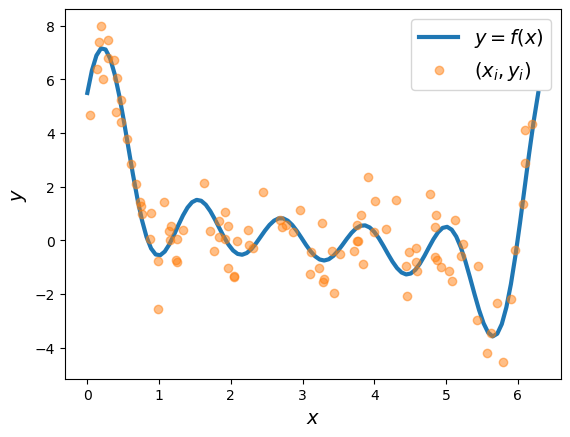

In [14]:
np.random.seed(42)
d = 5
intercept = np.random.normal()

def f(x):
    freqs = np.arange(1, d+1).reshape(1, -1)
    cos_features = np.cos(freqs*x.reshape(-1, 1))
    sin_features = np.sin(freqs*x.reshape(-1, 1))
    y = intercept + cos_features.sum(axis=1) + sin_features.sum(axis=1)
    return y

x = 2*np.pi*np.random.uniform(size=100)
X = x.reshape(-1, 1)

y = f(x) + 1.0*np.random.normal(size=100)
t = np.linspace(0, 2*np.pi, 100)
plt.plot(t, f(t), lw=3, label="$y=f(x)$")
plt.plot(x, y, 'o', alpha=0.5, label="$(x_i,y_i)$")
plt.legend(loc="upper right", fontsize=14)
plt.xlabel("$x$", fontsize=14)
plt.ylabel("$y$", fontsize=14)
plt.show()

In [15]:
freqs = np.arange(1, d+1).reshape(1, -1)
cos_features = np.cos(freqs*X)
sin_features = np.sin(freqs*X)
Z = np.hstack([cos_features, sin_features]) # Trigonometic features
Z.shape

(100, 10)

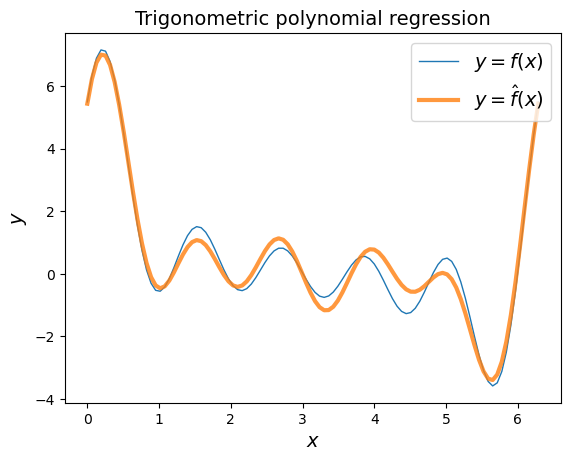

In [16]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(Z,y)

#to create a plot and make comparision
t = np.linspace(0, 2*np.pi, 100)
T = t.reshape(-1,1)
tfreqs = np.arange(1, d+1).reshape(1, -1)
tcos_features = np.cos(tfreqs*T)
tsin_features = np.sin(tfreqs*T)
Zt = np.hstack([tcos_features, tsin_features])



plt.plot(t, f(t), lw=1, label="$y=f(x)$")
plt.plot(t, model.predict(Zt), lw=3, label="$y=\hat{f}(x)$", alpha=0.8)
plt.legend(loc="upper right", fontsize=14)
plt.xlabel("$x$", fontsize=14)
plt.ylabel("$y$", fontsize=14)
plt.title("Trigonometric polynomial regression", fontsize=14)
plt.show()

## Hyper parameter tunning methods

In [8]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_wine

wine = load_wine()
X = wine.data
y = wine.target
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)

knn = KNeighborsClassifier()
grid_param = { 'n_neighbors' : list(range(2,11)) ,
              'algorithm' : ['auto','ball_tree','kd_tree','brute'] }

grid = GridSearchCV(knn,grid_param,cv = 5)
grid.fit(X_train,y_train)

#best parameter combination
grid.best_params_

#Score achieved with best parameter combination
grid.best_score_

#all combinations of hyperparameters
grid.cv_results_['params']

#average scores of cross-validation
grid.cv_results_['mean_test_score']


array([0.61945813, 0.67635468, 0.66871921, 0.7179803 , 0.6544335 ,
       0.69655172, 0.68251232, 0.68990148, 0.66847291, 0.61945813,
       0.67635468, 0.66871921, 0.7179803 , 0.6544335 , 0.69655172,
       0.68251232, 0.68990148, 0.66847291, 0.61945813, 0.67635468,
       0.66871921, 0.7179803 , 0.6544335 , 0.69655172, 0.68251232,
       0.68990148, 0.66847291, 0.61945813, 0.67635468, 0.66871921,
       0.7179803 , 0.6544335 , 0.69655172, 0.68251232, 0.68990148,
       0.66847291])

In [9]:
from sklearn.model_selection import RandomizedSearchCV

knn = KNeighborsClassifier()

grid_param = { 'n_neighbors' : list(range(2,11)) ,
              'algorithm' : ['auto','ball_tree','kd_tree','brute'] }

rand_ser = RandomizedSearchCV(knn,grid_param,n_iter=10)
rand_ser.fit(X_train,y_train)

#best parameter combination
rand_ser.best_params_

#score achieved with best parameter combination
rand_ser.best_score_

#all combinations of hyperparameters
rand_ser.cv_results_['params']

#average scores of cross-validation
rand_ser.cv_results_['mean_test_score']


array([0.68251232, 0.7179803 , 0.69655172, 0.66871921, 0.68251232,
       0.66871921, 0.7179803 , 0.67635468, 0.68251232, 0.68990148])

In [19]:
 %pip install scikit-optimize

Note: you may need to restart the kernel to use updated packages.


In [10]:
from skopt import BayesSearchCV

import warnings
warnings.filterwarnings("ignore")

# parameter ranges are specified by one of below
from skopt.space import Real, Categorical, Integer

knn = KNeighborsClassifier()
#defining hyper-parameter grid
grid_param = { 'n_neighbors' : list(range(2,11)) ,
              'algorithm' : ['auto','ball_tree','kd_tree','brute'] }

#initializing Bayesian Search
Bayes = BayesSearchCV(knn , grid_param , n_iter=30 , random_state=14)
Bayes.fit(X_train,y_train)

#best parameter combination
Bayes.best_params_

#score achieved with best parameter combination
Bayes.best_score_

#all combinations of hyperparameters
Bayes.cv_results_['params']

#average scores of cross-validation
Bayes.cv_results_['mean_test_score']


ModuleNotFoundError: No module named 'skopt'